# Chapter 7: Error and Exception Handling in Python

Writing **robust** Python programs necessitates an understanding of how to handle errors and exceptions.  
Python provides a powerful set of tools for controlling the flow of a program when an error occurs, preventing the program from terminating unexpectedly.  
In this chapter, we will explore Python's error and exception handling mechanisms, including built-in exceptions, the `try-except` block, and how to define your own exceptions.


## 1. Basic Try-Except Block

he expression of `try...except` as following

```
try:
    # the main body
except(Error1,Error2,...) as e:
    alert message
goto retry
```

If Python gets an exception but not be cached by an except module, the entire program will crash

Here is a simple go game example


In [1]:
board_size = 5
board = []
def initBoard():
    for i in range(board_size):
        row  = ['+'] * board_size
        board.append(row)

def printBoard():
    for i in range(board_size):
        for j in range(board_size):
            print(board[i][j], end = '')
        # equal to print('\n')
        print()
initBoard()
printBoard()

inputStr = input('Please input the coordinates with "x,y" style: \n')
while inputStr!= 'Done':
    try:
        x_str,y_str = inputStr.split(sep=',')
        if board[int(y_str)-1][int(x_str) - 1] != '+':
            inputStr = input('There already have a piece, please re-input')
            continue
        board[int(y_str)-1][int(x_str)-1] = '●'
        printBoard()
    except Exception:
        inputStr = input('Your input is illegal, please re-input')
        continue

+++++
+++++
+++++
+++++
+++++
●++++
+++++
+++++
+++++
+++++
●++++
+++++
+●+++
+++++
+++++


KeyboardInterrupt: Interrupted by user

## 2. `Exception` in Python

Python exceptions are organized in a hierarchy, allowing you to catch specific errors or groups of errors.

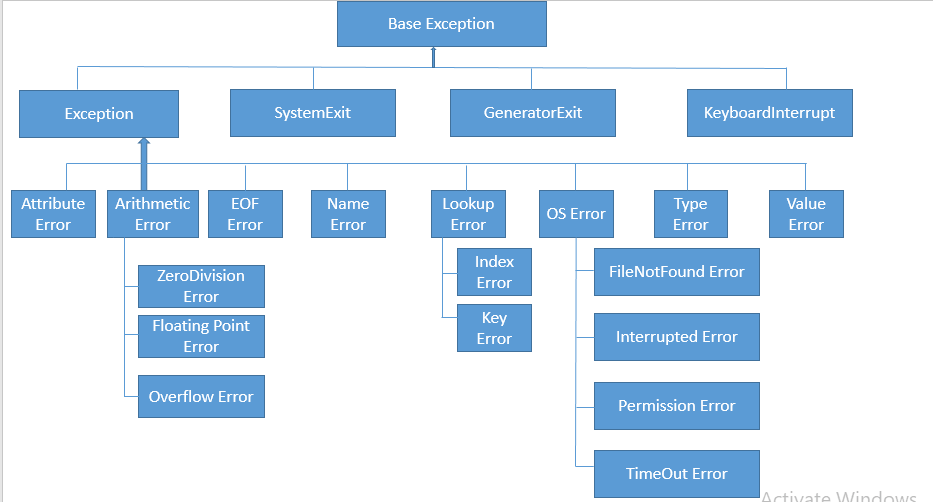


In [3]:
import sys
try:
    a = int(sys.argv[1])
    b = int(sys.argv[2])
    c = a / b
    print('The quotient is :',c)
except IndexError:
    print('index error: not enough input parameters')
except ValueError:
    print('Value Error: could only input integers')
except ArithmeticError:
    print('The denominator is 0')
except Exception:
    print('Unkown error')

Value Error: could only input integers


## 3. Handling multiple errors


In [6]:
try:
    a = int(sys.argv[1])
    b = int(sys.argv[2])
    c = a / b
    print('The quotient is :',c)
except(IndexError,ValueError,ArithmeticError):
    print('one of IndexError, ValueError and ArithmeticError happened')
except:
    print('unknown error')

one of IndexError, ValueError and ArithmeticError happened


## 4. Access error messages

Every instance of Exception contains the following properties:

- `args`: The index of the exception and it's descriptions
- `errno`: The index of the exception
- `strerror`: The description string of the exception
- `with_traceback()`: See the trajectory of the exception


In [11]:
def foo():
    try:
        fis = open('a.text')
    except Exception as e:
        # Get the index of the exception and it's descriptions
        print(e.args)
        # print(e.with_traceback())
        print(e.__repr__())
        print(e.errno)
foo()

(2, 'No such file or directory')
FileNotFoundError(2, 'No such file or directory')
2


## 5. `else` module

If there is **no error within the try section**, the program would go to the `else` part


In [12]:
s = input('Please input the denominator: ')
try:
    result = 20/ int(s)
    print('the quotient between 20 and %s is %g' %(s,result))
except ValueError:
    print('input error')
except ArithmeticError:
    print('Could not input 0')
else:
    print('No exception')

the quotient between 20 and 5 is 4
No exception


In [13]:
def else_test():
    s = input('Please input the denominator: ')
    result = 20 / int(s)
    print('the quotient between 20 and %s is %g' %(s,result))
def right_main():
    try:
        print('try section, no exception')
    except:
        print('Error!')
    else:
        else_test()
def wrong_main():
    try:
        print('try section, no exception')
        else_test()
    except:
        print('Error!')
wrong_main()
print('--------------------------------')
right_main()

try section, no exception
Error!
--------------------------------
try section, no exception


ZeroDivisionError: division by zero

## 6. `finally` module

- No matter there is error within `try` section or not, the code in final module would be executed.
- Because of that, do not use `return` or `raise` in finally part


In [14]:
import os
def test():
    fis = None
    try:
        fis = open('a.text')
    except OSError as e:
        print(e.strerror)
        return
    finally:
        print('Perform finally part!')
        if fis is not None:
            try:
                fis.close()
            except OSError as ios:
                print(ios.strerror)
test()

No such file or directory
Perform finally part!


## 7. Raise an exception

- `raise`: would raise a `RuntimeError` or get the error in the except part
- `raise xxxError`


In [19]:
def main():
    try:
        mtd(3)
    except Exception as e:
        print('Get an error')
        print(e)
    
def mtd(a):
    if a > 0:
        raise ValueError('a > 0!')
main()

Get an error
a > 0!


## 8. Self Defined Exception, raise and except

### 8.1 Self defined exception

Every error objects should be the subclass of `Exception`


In [20]:
class AuctionException(Exception): pass
raise AuctionException

AuctionException: 

### 8.2 `except` and `raise`

Transfer system-defined error to self defined error


In [21]:
class AuctionTest:
    def __init__(self,init_price):
        self.init_price = init_price
    def bid(self,bid_price):
        d = 0.0
        try:
            d = float(bid_price)
        except Exception as e:
            print('Find a error, ',e)
            raise AuctionException('The bid price must be a number!')
        if self.init_price > d:
            raise AuctionException('The bid price is too low!')
        init_price = d

        
def main():
    at = AuctionTest(200)
    try:
        at.bid('df')
    except AuctionException as e:
        print('The error in the main body,',e)

main()

Find a error,  could not convert string to float: 'df'
The error in the main body, The bid price must be a number!
